In [1]:
# making all packages for modelling available by importing
import pandas as pd # To work with dataset
import numpy as np  # To work with numbers
from sklearn.metrics import roc_auc_score # To get AUROC score(Area under the receiver operating characteristics)
from sklearn.metrics import roc_curve # To plot ROC curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics  # To model confusion matrix of dependent variable and independent variables
import matplotlib.pyplot as plt # For visualization
from sklearn.ensemble import RandomForestClassifier # To model Random forest
from sklearn.svm import SVC  #To model Support vector machine
from sklearn import tree # To model Decision tree
import random # As random.seed, to ensure answers are the same from time to time 
from sklearn.model_selection import train_test_split  # For dividing data to training and testing sets
from sklearn.linear_model import LogisticRegression  # To model Logistic regression


## Firstly, Let us read the cleaned data

In [2]:
# Getting and reading the cleaned data
df = pd.read_csv("Master2.csv")
df

,Gender,Age,MHPSYCH,MH2NEURL,MH8MUSCL,MH10GAST,MH12RENA,MH16SMOK,APGEN1,AXT117,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.135052,...,0.564103,0.018181,0.294351,0.661288,0.231135,0.000000,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.137113,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.000000,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141237,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.250000,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.182588,...,0.794872,0.175755,0.294351,0.274191,0.461591,0.500000,0.908967,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.251546,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.250000,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.0,0.709147,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.125207,...,0.437299,0.215729,0.238035,0.496518,0.275379,0.250000,0.803754,0.216203,0.106913,1
566,1.0,0.383815,0.0,0.0,0.0,0.0,0.0,0.319973,0.0,0.127671,...,0.613329,0.156363,0.278556,0.485164,0.204785,0.378857,0.908967,0.027824,0.027824,1
567,1.0,0.782722,0.0,0.0,1.0,0.0,0.0,0.322860,0.0,0.194257,...,0.564908,0.196903,0.280995,0.552580,0.196473,0.250000,0.915776,0.155777,0.042112,1
568,1.0,0.587083,1.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.148202,...,0.333333,0.232573,0.282278,0.592647,0.222365,0.278543,0.874064,0.361520,0.115543,1


## Let us know what the cleaned data is all about

In [3]:
# Getting a quick information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     570 non-null    float64
 1   Age        570 non-null    float64
 2   MHPSYCH    570 non-null    float64
 3   MH2NEURL   570 non-null    float64
 4   MH8MUSCL   570 non-null    float64
 5   MH10GAST   570 non-null    float64
 6   MH12RENA   570 non-null    float64
 7   MH16SMOK   570 non-null    float64
 8   APGEN1     570 non-null    float64
 9   AXT117     570 non-null    float64
 10  BAT126     570 non-null    float64
 11  HMT3       570 non-null    float64
 12  HMT7       570 non-null    float64
 13  HMT13      570 non-null    float64
 14  HMT40      570 non-null    float64
 15  HMT100     570 non-null    float64
 16  HMT102     570 non-null    float64
 17  RCT6       570 non-null    float64
 18  RCT11      570 non-null    float64
 19  RCT20      570 non-null    float64
 20  RCT392    

 ## Explanatory and target variables need to be separated using below chunk of codes and printed out

In [4]:
# Getting independent and dependent variables.

X = df.iloc[:, :-1]  #getting the features
y = df.iloc[:,-1]    # getting target variable

# Splitting the data for training and testing dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(399, 25) (171, 25) (399,) (171,)


## The Modeling stage. Starting with Logistics regression

## For Logistic model

Text(0.5, 1.0, 'Sigmoid Activation Function \n')

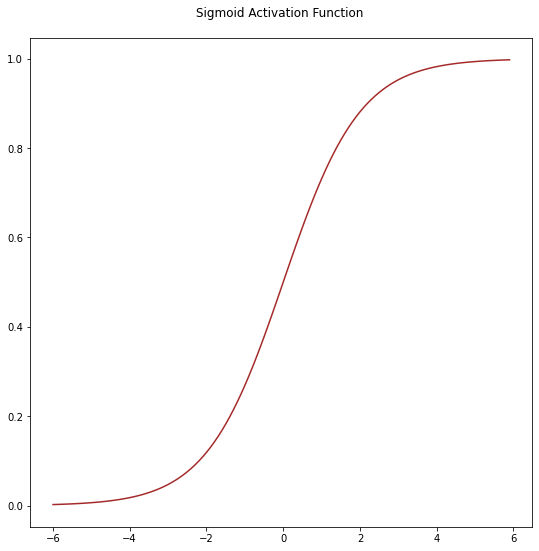

In [5]:
# Plotting the sigmoid activation function for logistic Regression
plt.figure(figsize=(9,9))
def sigmoid (h):
    return (1/(1+np.e**(-h)))
plot_range = np.arange(-6, 6, 0.1)
y_values =sigmoid(plot_range)

#plot the graph
plt.plot(plot_range, y_values, color = "brown")
plt.title("Sigmoid Activation Function \n")

#### The graph shows a logistic activation curve that is sigmoid function depictting that target variable in this case, Diagnosis will either contain 1 or 0 given the different values of the explanatory variables.

In [6]:
np.random.seed(14)

model = LogisticRegression() # assigning the classifier to model


model.fit(X_train, y_train) # modeling the training set using LG

y_predict = model.predict(X_test) # predicting target variable with untrained set

# Getting Accuracy score
print(y_predict)
test_log_score=model.score(X_test, y_test)
print(test_log_score)

[1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0]
0.9239766081871345


## For Decision Tree

For Testing data: 
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0]
0.9415204678362573


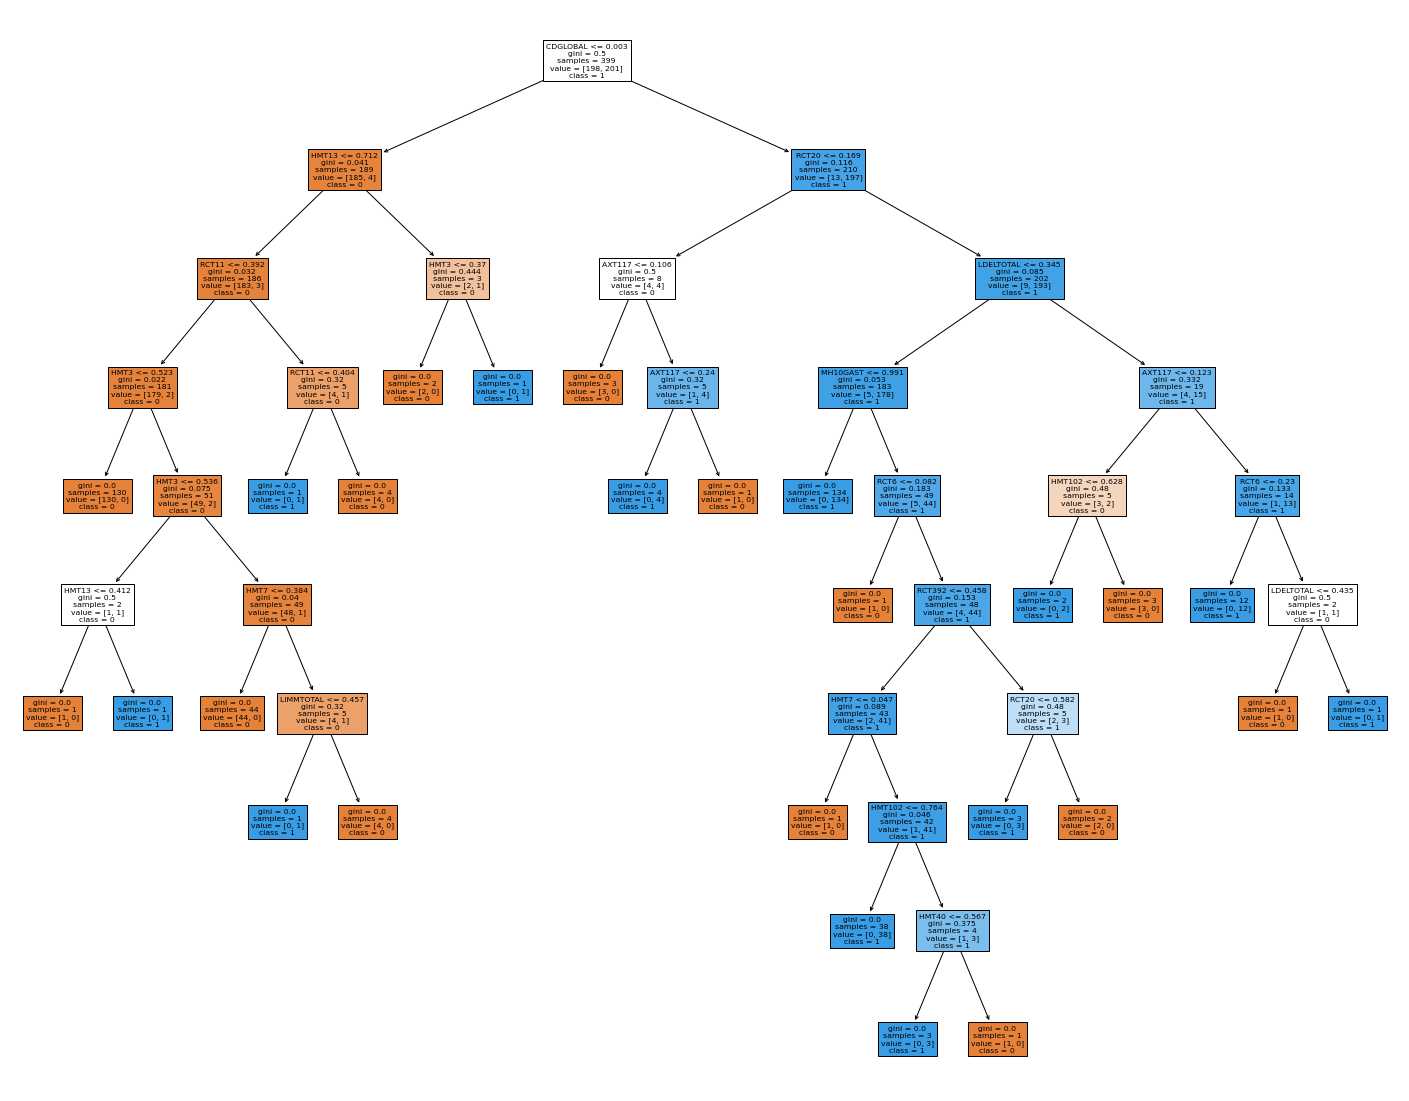

In [8]:
np.random.seed(14)
model1 = tree.DecisionTreeClassifier() # assigning the classifier to model1


model1.fit(X_train, y_train)  # modeling the training set using DT

y_predictD = model1.predict(X_test) # predicting target variable with untrained set

# Getting the accuracy score for DT
print("For Testing data: ") 
test_score=model1.score(X_test, y_test)
print(test_score)


# Plotting Decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1,
                   feature_names=X_train.columns,
                   class_names=["0", "1"],
                   filled=True)



- The column name and threshold are to split observations.
- Gini is the gini score or index for each node
- Samples is the numbers of observations in that node
- Values tells us how many in the node are in each category
- Class tells the category.

## For Random Forest

In [9]:
np.random.seed(14)
 
modelRF = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state= 0) #setting the model
#training the model
modelRF.fit(X_train, y_train)  # modeling the training set using RF

y_predictRF = modelRF.predict(X_test)  # predicting target variable with untrained set

# Getting the accuracy score for RF
test_score=modelRF.score(X_test, y_test)
print("For RF Testing data")
print(f"Accuracy score: {test_score}")
print(y_predictRF)

For RF Testing data
Accuracy score: 0.9766081871345029
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0]


## Support Vector Machine using linear kernel

For RF Testing data
Accuracy score: 0.9532163742690059
[1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0]


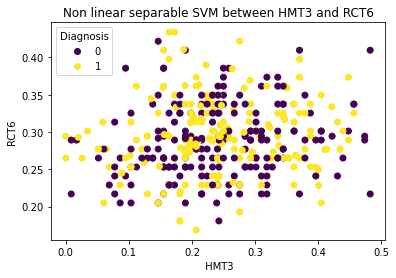

In [10]:
np.random.seed(14)
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train) # modeling the training set using SVM

y_predictSVM = svm_model.predict(X_test) # predicting target variable with untrained set

# Getting the accuracy score for SVM
test_score=svm_model.score(X_test, y_test)
print("For RF Testing data")
print(f"Accuracy score: {test_score}")
print(y_predictSVM)

# Plotting SVM
scatter=plt.scatter(X_train.iloc[:, 12], X_train.iloc[:, 18], c= y_train)
labels = [0,1]
plt.xlabel(" HMT3")
plt.ylabel("RCT6")
plt.title("Non linear separable SVM between HMT3 and RCT6")
plt.legend(handles=scatter.legend_elements()[0], 
           title="Diagnosis", labels= labels)
plt.show()

## Performance evaluation for all  model used


 
 LogisiticRegression 
 
 Diagnosis   0   1
row_0            
0          80   6
1           7  78

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        87
           1       0.92      0.93      0.92        84

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

Accuracy 
 0.9239766081871345
Specificity 
 0.9195402298850575
Sensitivity 
 0.9285714285714286
AUROC 
 0.924055829228243


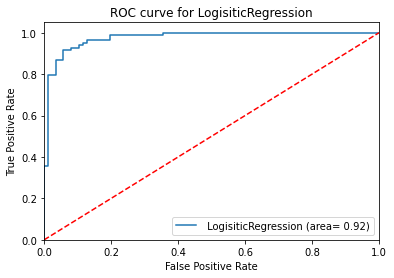


 
 Random Forest 
 
 Diagnosis   0   1
row_0            
0          83   0
1           4  84

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        87
           1       0.95      1.00      0.98        84

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy 
 0.9766081871345029
Specificity 
 0.9540229885057471
Sensitivity 
 1.0
AUROC 
 0.9770114942528736


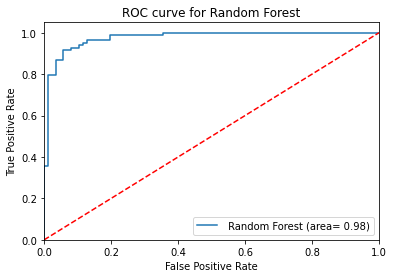


 
 Support Vector Classifier 
 
 Diagnosis   0   1
row_0            
0          83   4
1           4  80

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        87
           1       0.95      0.95      0.95        84

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy 
 0.9532163742690059
Specificity 
 0.9540229885057471
Sensitivity 
 0.9523809523809523
AUROC 
 0.9532019704433498


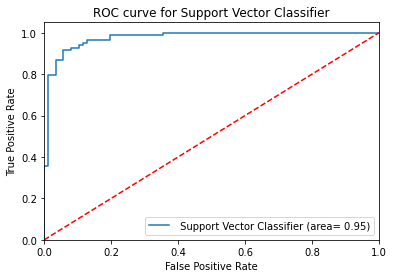


 
 DecisionTreeClassifier 
 
 Diagnosis   0   1
row_0            
0          80   3
1           7  81

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        87
           1       0.92      0.96      0.94        84

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy 
 0.9415204678362573
Specificity 
 0.9195402298850575
Sensitivity 
 0.9642857142857143
AUROC 
 0.9419129720853859


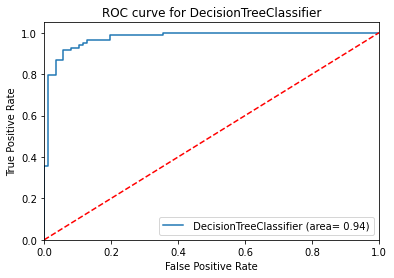

In [11]:
np.random.seed(14)

# storing the classifiers in a dictionary classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(kernel='linear'),
    "DecisionTreeClassifier": tree.DecisionTreeClassifier(),
}

# using for loop to iterate the classifier and perform identical operations.
for key, classifier in classifiers.items(): 
    y_pred = classifier.fit(X_train, y_train).predict(X_test) # modelling the data with individual classifier
    cf_matrix=pd.crosstab(y_pred, y_test)  # initializing confusing matrix for all classifiers 
    print(f"\n \n {key} \n \n {cf_matrix}\n") # Getting individual classifier confusion matrix table 
    
    # getting the claasification reports
    classification_rep = classification_report(y_test, y_pred) # initializing CR
    print(classification_rep)
    
    # getting the confusion matrix performance evaluation metrics
    cm1 = metrics.confusion_matrix(y_test, y_pred) # initializing performance evaluation metrics for each classifier
    total1=sum(sum(cm1)) # finding the total of the metrics
    Accuracy = (cm1[0,0]+cm1[1,1])/total1     # Initializing Accuracy
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])  # Initializing Specificity
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])     # Initializing Sensitivity
    print(f"Accuracy \n {Accuracy}")  # Getting Accuracy
    print(f"Specificity \n {Specificity}") # Getting Specificity
    print(f"Sensitivity \n {Sensitivity}")  # Getting Sensitivity
    
    # getting and plotting the AUROC
    logic_roc_auc = roc_auc_score(y_test, classifier.predict(X_test)) # Initializing AUROC
    print( f"AUROC \n {logic_roc_auc}")  # Getting AUROC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1]) # Initializing FPR, TPR and thresholds
    plt.figure()  # Automatically creats figures for visualization
    plt.plot(fpr, tpr, label= f" {key} (area= %0.2f)" % logic_roc_auc) # plotting ROC curve Using FPR, TPR, label and AUROC
    plt.plot([0, 1], [0, 1], 'r--') # setting range for plotting
    plt.xlim([0.0, 1.0]) # setting x limit
    plt.ylim([0.0, 1.05]) #setting t limit
    plt.xlabel("False Positive Rate") # labeling x axis with FPR
    plt.ylabel("True Positive Rate") # labeling y axis with TPR
    plt.title(f"ROC curve for {key}") # Creating a title
    plt.legend(loc="lower right") # creating legend
    plt.savefig("Loc_ROC") # saving the ROC curve plot
    plt.show() # dispplaying the plot